In [1]:
import glob
import os
import sys

In [2]:
train_round1_train1 = glob.glob(os.path.join("./data/guangdong_round1_train1_20180903/","*.jpg"))
train_round1_train2_norm= glob.glob(os.path.join("./data/guangdong_round1_train2_20180916/","*/*.jpg"))
train_round1_train2_defect = glob.glob(os.path.join("./data/guangdong_round1_train2_20180916/","*/*/*.jpg"))
train_round1_train2_other = glob.glob(os.path.join("./data/guangdong_round1_train2_20180916/","*/*/*/*.jpg"))

In [3]:
train_all_files = []
train_all_files.extend(train_round1_train1)
train_all_files.extend(train_round1_train2_norm)
train_all_files.extend(train_round1_train2_defect)
train_all_files.extend(train_round1_train2_other)

In [4]:
print("Total: {}".format(len(train_all_files)))

Total: 2386


In [5]:
g_name2eng = {
    "正常": "norm",
    "不导电": "defect1",
    "擦花": "defect2",
    "横条压凹": "defect3",
    "桔皮": "defect4",
    "漏底": "defect5",
    "碰伤": "defect6",
    "起坑": "defect7",
    "凸粉": "defect8",
    "涂层开裂": "defect9",
    "脏点": "defect10",
    "其他": "defect11",
}

In [6]:
others = ['碰凹', '气泡', '喷涂碰伤', '打磨印', '纹粗', '划伤', '油印', '打白点', '杂色', '粘接', '变形', '返底', '油渣', '驳口', '拖烂', '火山口', '铝屑']

In [7]:
label2files = {}

for f in train_all_files:
    basename = os.path.basename(f)
    label = basename.split("2018")[0]
    if label in others:
        label = "其他"
    if label not in label2files.keys():
        label2files[label] = []
    label2files[label].append(f)

In [8]:
print("Labels:{}".format(list(label2files.keys())))

Labels:['漏底', '凸粉', '其他', '擦花', '正常', '桔皮', '脏点', '不导电', '起坑', '涂层开裂', '碰伤', '横条压凹']


In [9]:
labels = list(label2files.keys())

In [10]:
values = [len(label2files[l]) for l in labels ]

In [11]:
import matplotlib.pyplot as plt
import matplotlib

In [12]:
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号

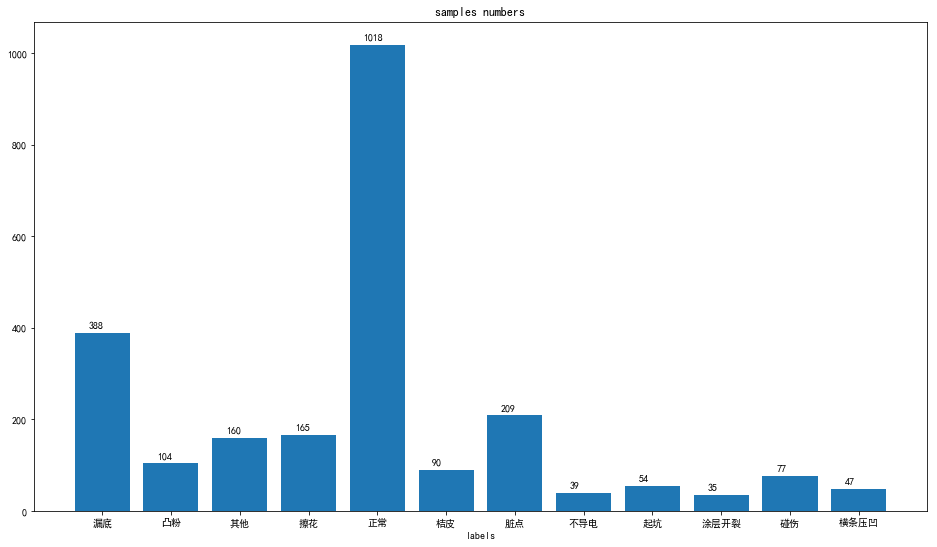

In [13]:
plt.figure(figsize=(16,9))
plt.bar(range(len(labels)), values)
plt.xticks(range(len(labels)), labels)

#plt.barh(range(len(labels)), values, height=1, color='steelblue', alpha=0.8)      # 从下往上画
#plt.yticks(range(len(labels)), labels)
#plt.xlim(30,47)
plt.xlabel("labels")
plt.title("samples numbers")
for x, y in enumerate(values):
    plt.text(x - 0.2 , y + 10, '%s' % y)
plt.show()


In [14]:
print("{}".format(matplotlib.matplotlib_fname()))

/home/zhanggw/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc


In [21]:
import numpy as np

samples_train = []
samples_valid = []

valid_factor = 0.3
train_factor = 400
for v in label2files.values():
    num = len(v)
    num_valid = int(np.ceil(num * valid_factor))
    v = np.random.permutation(v)
    print("num_valid:{}".format(num_valid))
    samples_valid.extend(v[:num_valid])
    
    samples_left = v[num_valid:]
    samples_train.extend(samples_left)
    if len(samples_left) < train_factor:
        samples_train.extend(np.random.choice(samples_left, train_factor - len(samples_left)))

num_valid:117
num_valid:32
num_valid:48
num_valid:50
num_valid:306
num_valid:27
num_valid:63
num_valid:12
num_valid:17
num_valid:11
num_valid:24
num_valid:15


In [31]:
print(len(samples_train))
print(len(samples_valid))
#print(samples_valid)

5112
722


In [30]:
import json
jsondata = {"data":{"train":samples_train, "valid":samples_valid}}
json_file = open("samples.json", 'w', encoding='utf-8')
json.dump(jsondata, json_file, indent=4, ensure_ascii=False)

In [17]:
import numpy as np
print(np.random.choice(8, 10))

[5 0 7 0 4 6 6 5 1 6]
